In [1]:
import os
if os.path.exists("/gss_gpfs_scratch/"):
    RMG_PY_PATH = os.path.expanduser('/gss_gpfs_scratch/westgroup/Importer/RMG-Py/')
    RMG_MODELS_PATH = os.path.expanduser('/gss_gpfs_scratch/westgroup/Importer/RMG-models')
else:
    RMG_PY_PATH = os.path.expanduser('~/Code/RMG-discovery/')
    RMG_MODELS_PATH = os.path.expanduser('~/Code/RMG-models')

In [2]:
import IPython
from IPython.display import display
import sys
import os
import re

sys.path.insert(1,RMG_PY_PATH) # a copy of RMG-Py on the `importer` branch.
from rmgpy.molecule import Molecule
import rmgpy.kinetics
import numpy
import cPickle as pickle
from collections import Counter, defaultdict
from rmgpy.reaction import Reaction
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import rmgpy.rmg
import rmgpy.data
import rmgpy.data.kinetics
import ck2cti
import numpy as np
import matplotlib.pyplot as plt

# This is an ipython notebook to process the results from running `sarathy_comparison.py` and `heptane_comparison.py`

### This is importing the ignition delays

In [3]:
import cPickle as pickle
import pandas as pd
f = open("../reference_files/ignition_delay_heptane.pkl", "r")
heptane_data = pickle.load(f)
print heptane_data.shape
g = open("../reference_files/ignition_delay_sarathy.pkl", "r")
sarathy_data = pickle.load(g)
print sarathy_data.shape

(16, 118)
(16, 56)


### This is getting the species dictionaries for each model

In [4]:
master = 'CombFlame2012/2028-Sarathy'
# Find and read the chemkin file
with open(os.path.join(RMG_MODELS_PATH, master,'import.sh')) as infile:
    shellscript = infile.read()
reactions_filename = re.search('--reactions\s+(\S+)',shellscript).group(1)
reactions_filepath = os.path.join(RMG_MODELS_PATH,master,reactions_filename)
thermo_filename = re.search('--thermo\s+(\S+)',shellscript).group(1)
thermo_filepath = os.path.join(RMG_MODELS_PATH,master,thermo_filename)
print(reactions_filepath)
print(thermo_filepath)
with open(reactions_filepath) as infile:
    chemkin = infile.readlines()
#for i,line in enumerate(chemkin):
    #print i, line.strip()             # uncomment to print the chemkin model
    
print "".join(chemkin[:4]) # print first 4 lines only

sarathy_parser = ck2cti.Parser()
surfaces = sarathy_parser.convertMech(inputFile=reactions_filepath,
                              thermoFile=thermo_filepath,
                              transportFile=None,
                              surfaceFile=None,
                              phaseName=None,
                              outName='sarathy_master.cti',
                              permissive=True)
sarathy_parser.reactions[0]

dict_path = os.path.join(RMG_MODELS_PATH, master, 'RMG-Py-kinetics-library', 'dictionary.txt')
print "Loading species_dict from",dict_path
sarathy_dict = rmgpy.data.kinetics.KineticsLibrary().getSpecies(dict_path)

oh*<=>oh+hv                                  1.450e+06      0.0           0.0
If the "--permissive" option was specified, this will be converted to an irreversible reaction with the photon removed.
ch*<=>ch+hv 1.860e+06 0.0 0.0
If the "--permissive" option was specified, this will be converted to an irreversible reaction with the photon removed.


/Users/nathan/Code/RMG-models/CombFlame2012/2028-Sarathy/model.txt
/Users/nathan/Code/RMG-models/CombFlame2012/2028-Sarathy/thermo.txt
!A comprehensive chemical kinetic combustion model for the four butanol isomers
!S.M. Sarathy, S. Vranckx, K. Yasunaga, M. Mehl, P. O�wald, W.K. Metcalfe,
!C. K. Westbrook, W.J. Pitz, K. Kohse-Hoinghaus, R.X. Fernandes, H.J Curran
!  Accepted Combustion and Flame, Dec 2011



INFO:root:Skipping unexpected species "hoco" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3cho2h" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3coch2o2h" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3coch2o" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "ch3chcho" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c3h2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h11-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h11-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h11-3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h10-1" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h10-2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "c5h81-3" while reading thermodynami

Wrote CTI mechanism file to 'sarathy_master.cti'.
Mechanism contains 431 species and 2346 reactions.
Loading species_dict from /Users/nathan/Code/RMG-models/CombFlame2012/2028-Sarathy/RMG-Py-kinetics-library/dictionary.txt


In [5]:
master = 'n-Heptane'
# Find and read the chemkin file
with open(os.path.join(RMG_MODELS_PATH, master,'import.sh')) as infile:
    shellscript = infile.read()
reactions_filename = re.search('--reactions\s+(\S+)',shellscript).group(1)
reactions_filepath = os.path.join(RMG_MODELS_PATH,master,reactions_filename)
thermo_filename = re.search('--thermo\s+(\S+)',shellscript).group(1)
thermo_filepath = os.path.join(RMG_MODELS_PATH,master,thermo_filename)
print(reactions_filepath)
print(thermo_filepath)
with open(reactions_filepath) as infile:
    chemkin = infile.readlines()
#for i,line in enumerate(chemkin):
    #print i, line.strip()             # uncomment to print the chemkin model
    
print "".join(chemkin[:4]) # print first 4 lines only

heptane_parser = ck2cti.Parser()
surfaces = heptane_parser.convertMech(inputFile=reactions_filepath,
                              thermoFile=thermo_filepath,
                              transportFile=None,
                              surfaceFile=None,
                              phaseName=None,
                              outName='sarathy_master.cti',
                              permissive=True)


dict_path = os.path.join(RMG_MODELS_PATH, master, 'RMG-Py-kinetics-library', 'dictionary.txt')
print "Loading species_dict from",dict_path
heptane_dict = rmgpy.data.kinetics.KineticsLibrary().getSpecies(dict_path)


/Users/nathan/Code/RMG-models/n-Heptane/nc7_ver3.1_mech.txt
/Users/nathan/Code/RMG-models/n-Heptane/n_heptane_v3.1_therm.dat
!n-heptane mechanism ver. 3.1 2012-03-30
!M. Mehl, W. J. Pitz, C. K. Westbrook and H. J. Curran, "Kinetic Modeling of Gasoline Surrogate Components and Mixtures under Engine Conditions," Proc. Combust. Inst.  33 (1) (2011) 193-200.
!LLNL-MI-536391
!March 2012: Multiplied the A-factors of the molecular elimination of HO2 from heptyl-O2 by a factor of 2. The previous version reported lower values doe to a clerical error in the uploaded file.



INFO:root:Skipping unexpected species "HOCO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3CHO2H" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3CHCHO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C3H51-2V3OOH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C3H52-1V3OOH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "IC5H12" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "AC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "BC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "DC5H11" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "AC5H10" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "BC5H10" while reading thermodynami

Wrote CTI mechanism file to 'sarathy_master.cti'.
Mechanism contains 654 species and 4846 reactions.
Loading species_dict from /Users/nathan/Code/RMG-models/n-Heptane/RMG-Py-kinetics-library/dictionary.txt


In [6]:
print "These are the errors for Sarathy model swaps"
from copy import deepcopy
test_data = deepcopy(sarathy_data)
test_data = test_data[test_data.apply(np.isfinite)].apply(np.log10)
data = test_data["0"][test_data['0'].apply(np.isfinite)].apply
temps = test_data["0"][test_data['0'].apply(np.isfinite)].index



sarathy_results = []
for col in test_data.columns:
        
    variation_data = test_data[col]
    print sarathy_parser.reactions[int(col)]
    
    i = 0
    E_sum = 0.0
    
    for temp in temps:
        log_delay = test_data[col].loc[temp]
        sarathy_delay = test_data['0'].loc[temp]
        i +=1
        E_sum += abs(sarathy_delay - log_delay)
        
        i +=1
        
    E_sum = E_sum / i
        
    
    sarathy_results.append([col, E_sum])
    
        
    print "For reaction {0} the error is {1}".format(col, E_sum)
    
    print

These are the errors for Sarathy model swaps
c2h5coch3 + o <=> ch2ch2coch3 + oh
For reaction 1150 the error is 6.92972546642e-05

ic4h8oh-2o2 + h2o2 <=> ic4h8oh-2o2h + ho2
For reaction 2105 the error is 4.42072089524e-05

nc4h9oh + ch3 <=> c4h8oh-4 + ch4
For reaction 1568 the error is 0.000102235700588

nc3h7cho + ho2 <=> c3h6cho-2 + h2o2
For reaction 1194 the error is 4.68962934308e-05

nc3h7cho + ch3 <=> nc3h7co + ch4
For reaction 1187 the error is 0.00041480400085

c2h6 + ch3o2 <=> c2h5 + ch3o2h
For reaction 196 the error is 0.000141752217814

ch2o + oh <=> hoch2o
For reaction 77 the error is 0.00639727906527

c2h5oh + ho2 <=> pc2h4oh + h2o2
For reaction 369 the error is 5.43663823429e-05

ch3och3 + ch3o2 <=> ch3och2 + ch3o2h
For reaction 435 the error is 4.32623854213e-05

ic4h8oh-3o2 + h2o2 <=> ic4h8oh-3o2h + ho2
For reaction 2106 the error is 4.28381320256e-05

pc4h9o2 + pc4h9o2 -> o2 + pc4h9o + pc4h9o
For reaction 1081 the error is 3.22710226016e-05

sc4h9oh + ho2 <=> sc4h8oh-3 

In [7]:
sarathy_results = pd.DataFrame(sarathy_results)
sarathy_results.columns = ["model", "error"]
sarathy_results = sarathy_results.set_index("model")
sarathy_results

,error
model,
1150,0.000069
2105,0.000044
1568,0.000102
1194,0.000047
1187,0.000415
196,0.000142
77,0.006397
369,0.000054
435,0.000043


In [8]:
print "These are the errors for the Heptane model swaps"
from copy import deepcopy
test_data = deepcopy(heptane_data)
test_data = test_data[test_data.apply(np.isfinite)].apply(np.log10)
data = test_data["0"][test_data['0'].apply(np.isfinite)]
temps = test_data["0"][test_data['0'].apply(np.isfinite)].index

heptane_results = []
for col in test_data.columns:
    
    
        
    variation_data = test_data[col]
    
    i = 0
    E_sum = 0.0
    
    for temp in temps:
        log_delay = test_data[col].loc[temp]
        heptane_delay = test_data['0'].loc[temp]
        i +=1
        E_sum += abs(heptane_delay - log_delay)
        
        i +=1
        
    E_sum = E_sum / i
    
    heptane_results.append([col, E_sum])
    
        
    print "For reaction {0} the error is {1}".format(col, E_sum)
    
    print

These are the errors for the Heptane model swaps
For reaction 1285 the error is 1.6137108772e-05

For reaction 2637 the error is 5.95544913926e-06

For reaction 3486 the error is 1.27935634321e-06

For reaction 2493 the error is 2.66785835112e-06

For reaction 2195 the error is 2.33768484214e-06

For reaction 3573 the error is 8.36854092136e-07

For reaction 3621 the error is 0.000417218416217

For reaction 2591 the error is 5.73680557979e-05

For reaction 285 the error is 0.000167070058457

For reaction 105 the error is 3.14207750394e-05

For reaction 2957 the error is 1.15705459581e-06

For reaction 4350 the error is 1.93320373551e-06

For reaction 33 the error is 0.000387761132053

For reaction 2062 the error is 1.15256705587e-06

For reaction 2494 the error is 2.55991345283e-06

For reaction 2760 the error is 2.54233454316e-06

For reaction 86 the error is 0.00412178642937

For reaction 1726 the error is 3.22960652815e-06

For reaction 4112 the error is 1.94776553981e-05

For react

In [9]:
heptane_results = pd.DataFrame(heptane_results)
heptane_results.columns = ["model","error"]
heptane_results = heptane_results.set_index("model")
heptane_results

,error
model,
1285,1.613711e-05
2637,5.955449e-06
3486,1.279356e-06
2493,2.667858e-06
2195,2.337685e-06
3573,8.368541e-07
3621,4.172184e-04
2591,5.736806e-05
285,1.670701e-04


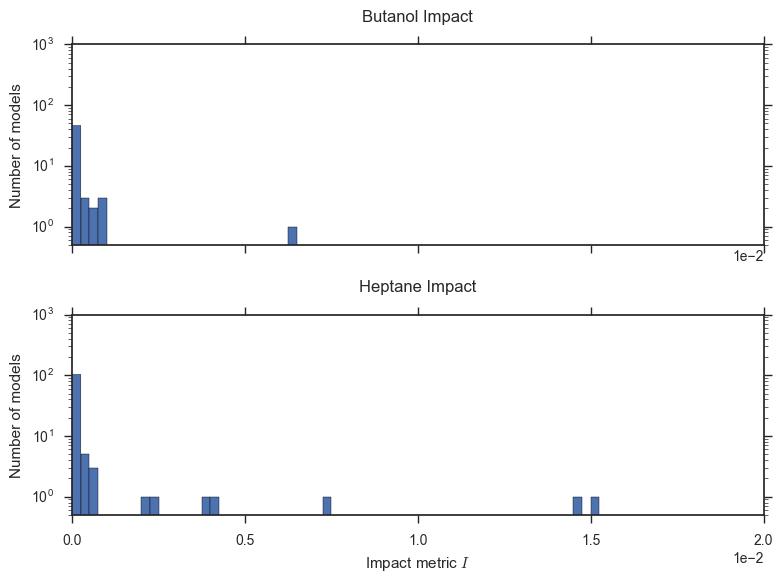

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)

heptane_results["error"].plot.hist(bins=np.arange(0,0.02,0.00025), ax=ax2, log=True, sharex=True, grid=False)
sarathy_results["error"].plot.hist(bins=np.arange(0,0.02,0.00025), ax=ax1, log=True, sharex=True, grid=False)

ax1.set_ylim([0.5,1000])
ax2.set_ylim([0.5,1000])

ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax1.set_ylabel("Number of models")
ax2.set_ylabel("Number of models")
ax2.set_xlabel("Impact metric $I$")

ax1.set_title("Butanol Impact", y=1.08)
ax2.set_title("Heptane Impact", y=1.08)

plt.tight_layout()


fig.savefig("impact_hist.pdf")

high_impact_heptane_rxns = heptane_results[heptane_results["error"] > 0.5*10**-2]
high_impact_sarathy_rxns = sarathy_results[sarathy_results["error"] > 0.5*10**-2]


In [11]:
high_impact_heptane_rxns = heptane_results[heptane_results["error"] > 0.5*10**-2]
high_impact_sarathy_rxns = sarathy_results[sarathy_results["error"] > 0.5*10**-2]

In [12]:
print "The following reactions in the BUTANOL MODEL are high impact based on our impact metric"

# pulled this reactions by hand because of some indexing error that happened with the parser
important_sarathy_reactions= {}
for index in high_impact_sarathy_rxns.index:
    
    rxn = sarathy_parser.reactions[int(index)-1]
    print rxn
    r1, r2 = rxn.reactants
    p1, p2 = rxn.products
    s1 = r1[1]
    s2 = r2[1]
    s3 = p1[1]
    s4 = p2[1]

    important_sarathy_reactions[int(index)] = Reaction(
        reactants = [sarathy_dict[s1.label], sarathy_dict[s2.label]], 
        products= [sarathy_dict[s3.label], sarathy_dict[s4.label]],
        reversible = True)  


The following reactions in the BUTANOL MODEL are high impact based on our impact metric
ch2o + ho2 <=> hco + h2o2


In [13]:
print "The following reactions in the HEPTANE MODEL are high impact based on our impact metric"

important_heptane_reactions = {}
# pulled this reactions by hand because of some indexing error that happened with the parser
for index in high_impact_heptane_rxns.index:
    
    rxn = heptane_parser.reactions[int(index)-1]
    print rxn
    r1, r2 = rxn.reactants
    p1, p2 = rxn.products
    s1 = r1[1]
    s2 = r2[1]
    s3 = p1[1]
    s4 = p2[1]

    important_heptane_reactions[int(index)] = Reaction(
        reactants = [heptane_dict[s1.label], heptane_dict[s2.label]], 
        products= [heptane_dict[s3.label], heptane_dict[s4.label]],
        reversible = True) 

The following reactions in the HEPTANE MODEL are high impact based on our impact metric
NC7H16 + HO2 -> C7H15-4 + H2O2
NC7H16 + HO2 -> C7H15-3 + H2O2
NC7H16 + HO2 -> C7H15-2 + H2O2


# Looking at the PyTeCK reactions with high error

In [14]:
import os
import yaml
import brewer2mpl
import imageio
import pandas as pd

model_list = [f.split(".cti")[0] for f in os.listdir("/Users/nathan/Code/OOHabstraction/comparisonTST/reference_files/cantera_sub_models/sarathy/") if f.endswith(".cti")]

models = []

for model in model_list:
    results_file = os.path.join("/Users/nathan/Code/OOHabstraction/comparisonTST/test_performance/pyteck_results", model + "-results.yaml")

    if os.path.exists(results_file):
        with open(results_file, 'r') as f:
            results = yaml.load(f)
        

        models.append([results['model'], results["average error function"], results['average deviation function'], results['error function standard deviation']])
data = pd.DataFrame(models, columns=["model","error", "average deviation function", "error function standard deviation" ])
data

,model,error,average deviation function,error function standard deviation
0,master.0.0.cti,18.976938,2.604103,20.563292
1,master.1081.1.cti,18.976653,2.604035,20.563037
2,master.1148.1.cti,18.976755,2.604152,20.562803
3,master.1150.1.cti,18.977106,2.604114,20.562985
4,master.1187.1.cti,21.999477,2.971725,23.275360
5,master.1194.1.cti,19.043000,2.612679,20.627439
6,master.1195.1.cti,19.034962,2.611526,20.613214
7,master.1196.1.cti,19.173118,2.630015,20.750252
8,master.1211.1.cti,18.977671,2.604095,20.563745
9,master.1233.1.cti,18.977013,2.604135,20.562425


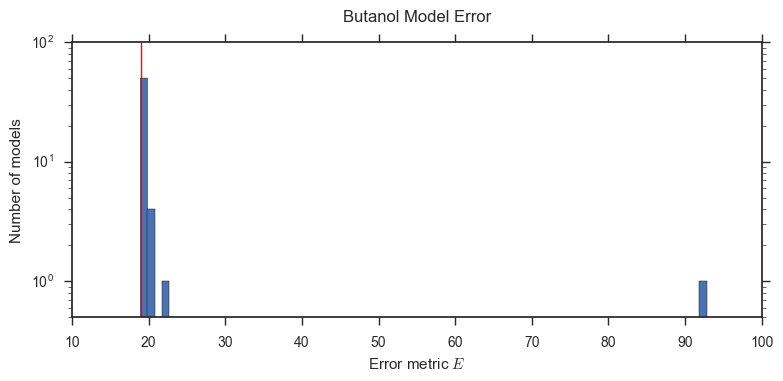

In [15]:
data.error.hist(bins=80, log=True, figsize=(8,4))
plt.grid(False)
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.ylim([0.5,100])
plt.vlines(data.error[0],0,100, color='red', linewidth=1)
plt.title("Butanol Model Error", y=1.05)
plt.tight_layout()
plt.savefig("butanol_error.pdf")

In [16]:
high_error_rxn_index = int(data.sort_values("error", ascending=False)['model'].iloc[0].split(".")[1])
rxn = sarathy_parser.reactions[high_error_rxn_index-1]
print rxn
print high_error_rxn_index
r1, r2 = rxn.reactants
p1, p2 = rxn.products
s1 = r1[1]
s2 = r2[1]
s3 = p1[1]
s4 = p2[1]

important_sarathy_reactions[high_error_rxn_index] = Reaction(
    reactants = [sarathy_dict[s1.label], sarathy_dict[s2.label]], 
    products= [sarathy_dict[s3.label], sarathy_dict[s4.label]],
    reversible = True) 


nc4h9oh + ho2 <=> c4h8oh-1 + h2o2
1567


In [17]:
important_sarathy_reactions

{77: Reaction(reactants=[Species(label="ch2o", molecule=[Molecule(SMILES="C=O")]), Species(label="ho2", molecule=[Molecule(SMILES="[O]O")])], products=[Species(label="hco", molecule=[Molecule(SMILES="[CH]=O")]), Species(label="h2o2", molecule=[Molecule(SMILES="OO")])]),
 1567: Reaction(reactants=[Species(label="nc4h9oh", molecule=[Molecule(SMILES="CCCCO")]), Species(label="ho2", molecule=[Molecule(SMILES="[O]O")])], products=[Species(label="c4h8oh-1", molecule=[Molecule(SMILES="CCC[CH]O")]), Species(label="h2o2", molecule=[Molecule(SMILES="OO")])])}

### Importing the importer kinetics (need to remake this pickle file)

In [18]:
h = open("../reference_files/importerKinetics.pkl", "r")
importer_kinetics = pickle.load(h)
importer_kinetics = pd.DataFrame(importer_kinetics)
importer_kinetics

,IC3H7OO + NC5H10 => C3H7OOH + NC5H9-4,C6H5 + CYC5H8 => C6H6 + CYC5H7,C6H4CH3 + CYC5H8 => C7H8 + CYC5H7,c8ooh4-3o2 <=> c8ket4-3 + oh,pC4H9 + OH <=> C4H81 + H2O,C6H5O + CYC5H8 => C6H5OH + CYC5H7,PC7H15O2 + QC7H15O2 => O2 + PC7H15O + QC7H15O,C4H8-1 + CH3CO <=> C4H8COCH3-3,ic4h7o + h2 <=> ic4h7oh + h,ic3h5oh + h <=> tc3h6oh,...,C11OOH1-3O2 <=> C11OOH1-3 + O2,OHX + O2 <=> HO2 + O,C11OOH1-4O2 <=> C11OOH1-4 + O2,IC3H7OO + CYC6H8 => C3H7OOH + C6H6 + H,A2- + C4H4 <=> A3 + H,C11OOH2-1O2 <=> C11OOH2-1 + O2,CH3TXcC6H10 + O2 <=> CH3-1-cC6H9 + HO2,C11OOH3-2O2 <=> C11OOH3-2 + O2,SC4H7 + NC3H7OH => NC4H8 + CH3CHCH2OH,sc4h9o2 + c4h10 <=> sc4h9o2h + sc4h9
AramcoMech_1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(9.05e+06,'cm^3/(mol*s)'), n=2, Ea...","Arrhenius(A=(6.25e+11,'cm^3/(mol*s)'), n=0.51,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."
AramcoMech_2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AutoTST-OOHabstraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biomass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chernov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2012/2028-Sarathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(9.05e+06,'cm^3/(mol*s)'), n=2, Ea...","Arrhenius(A=(6.25e+11,'cm^3/(mol*s)'), n=0.51,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1315-Chang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2013/1541-Zhang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(9.05e+06,'cm^3/(mol*s)'), n=2, Ea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."
CombFlame2013/1609-Veloo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CombFlame2013/17-Malewicki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.3e+13,'cm^3/(mol*s)'), n=0, Ea=...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Arrhenius(A=(1.12e+13,'cm^3/(mol*s)'), n=0, Ea..."


### Getting the list of autoTST OOH reactions

In [19]:
f = open("../../autotst_kinetics.pkl","r")
autotst_kinetics = pickle.load(f)
ooh_reactions = []
for rxn in autotst_kinetics:
    reactants, products = rxn.label.split("_")
    r1, r2 = reactants.split('+')
    p1, p2 = products.split('+')
    if "OO" in [r1, r2, p1, p2] and "[O]O" in [r1, r2, p1, p2]:
        #print [r1, r2, p1, p2]
        ooh_reactions.append(rxn)

### Creating nickname dictionaries 

In [20]:
sarathy_smiles_to_nickname_dict = {}
for species in sarathy_dict.itervalues():
    #print len(species.molecule[0].toSMILES())
    for mol in species.molecule:
        sarathy_smiles_to_nickname_dict[mol.toSMILES()] = species.label
    

heptane_smiles_to_nickname_dict = {}
for species in heptane_dict.itervalues():
    #print len(species.molecule[0].toSMILES())
    for mol in species.molecule:
        heptane_smiles_to_nickname_dict[mol.toSMILES()] = species.label
    
print "Dictionaries created"

Dictionaries created


In [21]:
import itertools
sarathy_rxns = []
for reaction_index, sarathy_reaction in important_sarathy_reactions.iteritems():
    
    reactants = [n.molecule[-1].toSMILES() for n in sarathy_reaction.reactants]
    products = [n.molecule[-1].toSMILES() for n in sarathy_reaction.products]

    joined_reactant_orders = ['+'.join(order) for order in itertools.permutations(reactants)]
    joined_product_orders = ['+'.join(order) for order in itertools.permutations(products)]
    possible_labels = ['_'.join((joined_r, joined_p)) for joined_r in joined_reactant_orders for joined_p in joined_product_orders]
    
    
    for ooh_reaction in ooh_reactions:
        if ooh_reaction.label in possible_labels:
            ooh_reactants, ooh_products = ooh_reaction.label.split("_")
            r1, r2 = ooh_reactants.split("+")
            p1, p2 = ooh_products.split("+")
            ooh_smiles = [r1, r2, p1, p2]

            inchikey_to_smiles_dict = {}
            for smiles in ooh_smiles:
                inchikey_to_smiles_dict[Molecule(SMILES=smiles).toInChIKey()] = smiles
        
    
            for reactant in ooh_reaction.reactants:
                inchi_key = reactant.label.split("-u")[0]
                if not reactant.label in sarathy_smiles_to_nickname_dict.itervalues():
                    reactant.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                    reactant.label = sarathy_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]
                
                
            for product in ooh_reaction.products:
                inchi_key = product.label.split("-u")[0]
                if not product.label in sarathy_smiles_to_nickname_dict.itervalues():
                    product.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                    product.label = sarathy_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]
                
                
            
            sarathy_rxns.append([reaction_index + 1, sarathy_reaction, ooh_reaction])#, reaction.toChemkin(), reaction.toCantera()])
        
sarathy_df = pd.DataFrame(sarathy_rxns)

sarathy_df.columns = ["Reaction Index", "Importer Reaction", "AutoTST Reaction"]#, "AutoTST Reaction - Chemkin" , "AutoTST - Cantera"]

sarathy_df


,Reaction Index,Importer Reaction,AutoTST Reaction
0,78,ch2o + ho2 <=> hco + h2o2,ch2o + ho2 <=> h2o2 + hco
1,1568,nc4h9oh + ho2 <=> c4h8oh-1 + h2o2,nc4h9oh + ho2 <=> c4h8oh-1 + h2o2


In [22]:
heptane_rxns = []
for reaction_index, heptane_reaction in important_heptane_reactions.iteritems():
    print heptane_reaction
    
    reactants = [n.molecule[-1].toSMILES() for n in heptane_reaction.reactants]
    products = [n.molecule[-1].toSMILES() for n in heptane_reaction.products]

    joined_reactant_orders = ['+'.join(order) for order in itertools.permutations(reactants)]
    joined_product_orders = ['+'.join(order) for order in itertools.permutations(products)]
    possible_labels = ['_'.join((joined_r, joined_p)) for joined_r in joined_reactant_orders for joined_p in joined_product_orders]
    
    
    for ooh_reaction in ooh_reactions:
        if ooh_reaction.label in possible_labels:
            ooh_reactants, ooh_products = ooh_reaction.label.split("_")
            r1, r2 = ooh_reactants.split("+")
            p1, p2 = ooh_products.split("+")
            ooh_smiles = [r1, r2, p1, p2]
            
            reacts = [r1, r2]
            prods = [p1, p2]
            
            print ooh_smiles

            inchikey_to_smiles_dict = {}
            for smiles in ooh_smiles:
                inchikey_to_smiles_dict[Molecule(SMILES=smiles).toInChIKey()] = smiles
                
            #print inchikey_to_smiles_dict
        
            try:
                for reactant in ooh_reaction.reactants:
                    inchi_key = reactant.label.split("-u")[0]
                    print inchi_key
                    if not reactant.label in heptane_smiles_to_nickname_dict.itervalues():
                        reactant.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                        reactant.label = heptane_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]


                for product in ooh_reaction.products:
                    inchi_key = product.label.split("-u")[0]
                    if not product.label in heptane_smiles_to_nickname_dict.itervalues():
                        product.molecule = [Molecule(SMILES=inchikey_to_smiles_dict[inchi_key])]
                        product.label = heptane_smiles_to_nickname_dict[inchikey_to_smiles_dict[inchi_key]]
            except:
                print "Fuck"
                
                
            
            heptane_rxns.append([reaction_index + 1, heptane_reaction, ooh_reaction])#, reaction.toChemkin(), reaction.toCantera()])
        
heptane_df = pd.DataFrame(heptane_rxns)

heptane_df.columns = ["Reaction Index", "Importer Reaction", "AutoTST Reaction"]#, "AutoTST Reaction - Chemkin" , "AutoTST - Cantera"]

heptane_df


NC7H16 + HO2 <=> C7H15-3 + H2O2
['CCCCCCC', '[O]O', 'CC[CH]CCCC', 'OO']
OUUQCZGPVNCOIJ-UHFFFAOYSA
IMNFDUFMRHMDMM-UHFFFAOYSA
NC7H16 + HO2 <=> C7H15-4 + H2O2
['CCCCCCC', '[O]O', 'CCC[CH]CCC', 'OO']
OUUQCZGPVNCOIJ-UHFFFAOYSA
IMNFDUFMRHMDMM-UHFFFAOYSA
NC7H16 + HO2 <=> C7H15-2 + H2O2
['CCCCCCC', '[O]O', 'C[CH]CCCCC', 'OO']
OUUQCZGPVNCOIJ-UHFFFAOYSA
IMNFDUFMRHMDMM-UHFFFAOYSA


,Reaction Index,Importer Reaction,AutoTST Reaction
0,3625,NC7H16 + HO2 <=> C7H15-3 + H2O2,HO2 + NC7H16 <=> H2O2 + C7H15-3
1,3627,NC7H16 + HO2 <=> C7H15-4 + H2O2,HO2 + NC7H16 <=> C7H15-4 + H2O2
2,3623,NC7H16 + HO2 <=> C7H15-2 + H2O2,HO2 + NC7H16 <=> C7H15-2 + H2O2


In [23]:
reactions_df = pd.concat([sarathy_df, heptane_df])
reactions_df = reactions_df.set_index("Reaction Index")
reactions_df

,Importer Reaction,AutoTST Reaction
Reaction Index,,
78,ch2o + ho2 <=> hco + h2o2,ch2o + ho2 <=> h2o2 + hco
1568,nc4h9oh + ho2 <=> c4h8oh-1 + h2o2,nc4h9oh + ho2 <=> c4h8oh-1 + h2o2
3625,NC7H16 + HO2 <=> C7H15-3 + H2O2,HO2 + NC7H16 <=> H2O2 + C7H15-3
3627,NC7H16 + HO2 <=> C7H15-4 + H2O2,HO2 + NC7H16 <=> C7H15-4 + H2O2
3623,NC7H16 + HO2 <=> C7H15-2 + H2O2,HO2 + NC7H16 <=> C7H15-2 + H2O2


### Plotting the results

##########
CCCCCCC+[O]O_C[CH]CCCCC+OO (Rxn Index: 3623) is in the folloing models:
(13,)

CombFlame2013/17-Malewicki
CombFlame2014/65-Darcy
Gasoline_2
Gasoline_Surrogate
PCI2013/289-Dagaut
PCI2013/335-Wang
PCI2013/353-Malewicki
PCI2013/361-Malewicki
PCI2013/401-Liu
PCI2013/411-Darcy
PCI2017/036-Rashidi
n-Heptane
AutoTST
CCCCCCC+[O]O_C[CH]CCCCC+OO


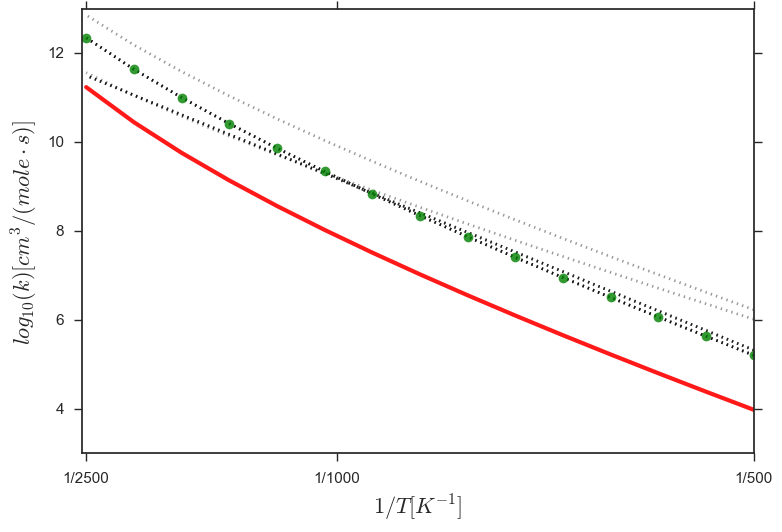

##########
CCCCCCC+[O]O_CC[CH]CCCC+OO (Rxn Index: 3625) is in the folloing models:
(13,)

CombFlame2013/17-Malewicki
CombFlame2014/65-Darcy
Gasoline_2
Gasoline_Surrogate
Narayanaswamy
PCI2013/335-Wang
PCI2013/353-Malewicki
PCI2013/361-Malewicki
PCI2013/401-Liu
PCI2013/411-Darcy
PCI2017/036-Rashidi
n-Heptane
AutoTST
CCCCCCC+[O]O_CC[CH]CCCC+OO


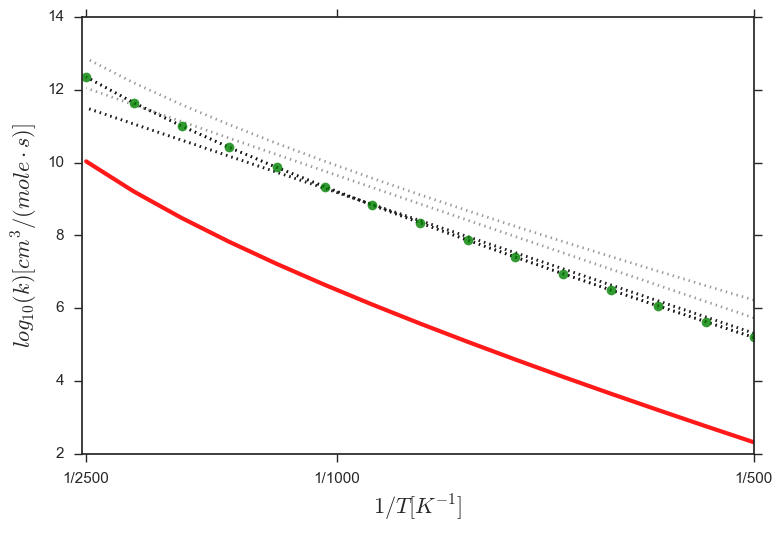

##########
C=O+[O]O_OO+[CH]=O (Rxn Index: 78) is in the folloing models:
(61,)

AramcoMech_1.3
AramcoMech_2.0
AutoTST-OOHabstraction
Chernov
CombFlame2012/2028-Sarathy
CombFlame2013/1315-Chang
CombFlame2013/1541-Zhang
CombFlame2013/17-Malewicki
CombFlame2013/1939-Cai
CombFlame2013/1958-Zhao
CombFlame2013/2291-Somers
CombFlame2013/2712-Sarathy
CombFlame2013/487-Schenk
CombFlame2014/1135-Dames
CombFlame2014/405-Cai
CombFlame2014/65-Darcy
CombFlame2014/657-Jin
CombFlame2014/84-Wang
GRI-mech-3.0
Gasoline_2
Gasoline_Surrogate
IJCK2013/638-Metcalfe
MB-Dooley
MB-Farooq
MB-Fisher
Narayanaswamy
PCI2013/225-Somers
PCI2013/259-Labbe
PCI2013/289-Dagaut
PCI2013/297-Herbinet
PCI2013/325-Husson
PCI2013/335-Wang
PCI2013/353-Malewicki
PCI2013/361-Malewicki
PCI2013/401-Liu
PCI2013/411-Darcy
PCI2013/527-Sheen
PCI2013/599-Veloo
PCI2015/0153-Marshall
PCI2015/0325-Nawdiyal
PCI2017/012-Felsmann
PCI2017/022-Thion
PCI2017/024-Bohon
PCI2017/025-Sudholt
PCI2017/032-Cheng
PCI2017/036-Rashidi
PCI2017/037-Sakai
PCI

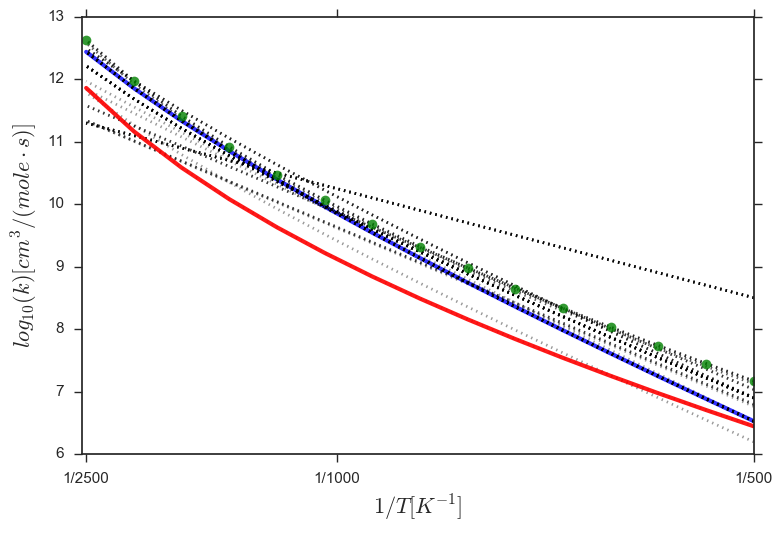

##########
CCCCO+[O]O_CCC[CH]O+OO (Rxn Index: 1568) is in the folloing models:
(5,)

AutoTST-OOHabstraction
CombFlame2012/2028-Sarathy
CombFlame2013/1939-Cai
PCI2013/289-Dagaut
AutoTST
CCCCO+[O]O_CCC[CH]O+OO


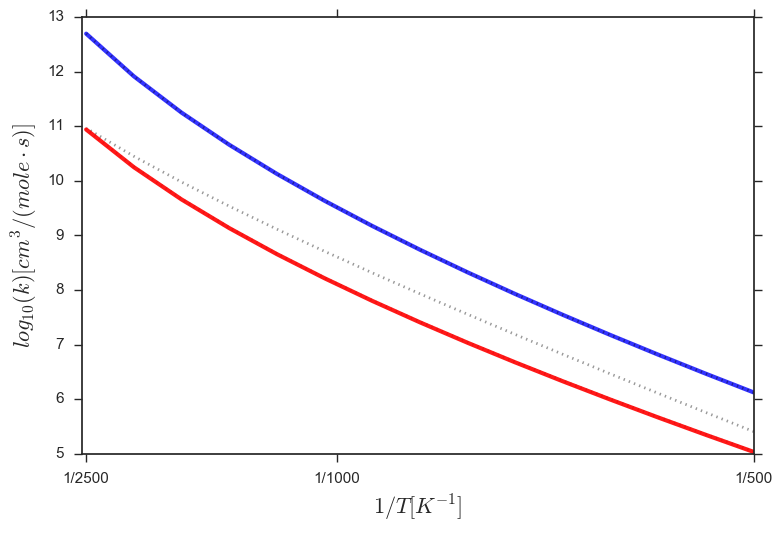

##########
CCCCCCC+[O]O_CCC[CH]CCC+OO (Rxn Index: 3627) is in the folloing models:
(12,)

CombFlame2013/17-Malewicki
CombFlame2014/65-Darcy
Gasoline_2
Gasoline_Surrogate
PCI2013/335-Wang
PCI2013/353-Malewicki
PCI2013/361-Malewicki
PCI2013/401-Liu
PCI2013/411-Darcy
PCI2017/036-Rashidi
n-Heptane
AutoTST
CCCCCCC+[O]O_CCC[CH]CCC+OO


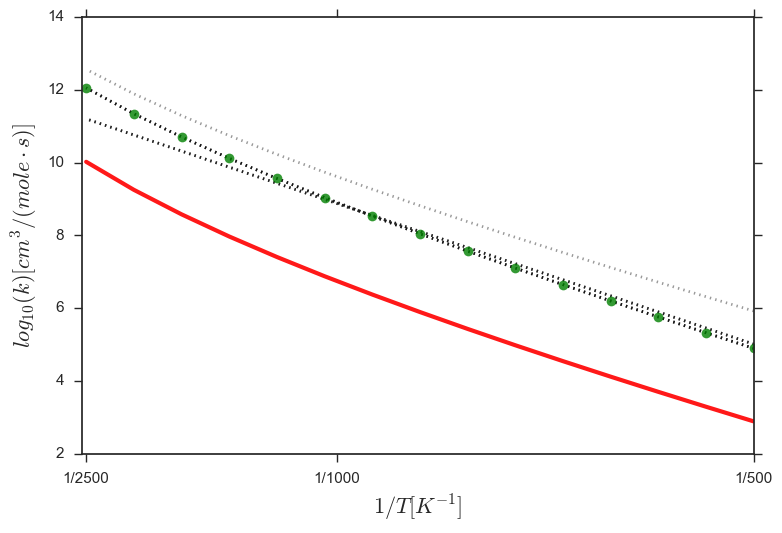

In [24]:
import numpy as np
from rmgpy.reaction import _isomorphicSpeciesList
inverseTemps = np.linspace(1000./500., 1000./2500., 15)
Temps = 1000./inverseTemps

comparisonPressure = 1e5 # Pa
for i, reaction in enumerate(importer_kinetics.columns):
    for index in reactions_df.index:
        autotst_rxn = reactions_df["AutoTST Reaction"].loc[index]
        

        
        if reaction.isIsomorphic(autotst_rxn) and _isomorphicSpeciesList(reaction.reactants, autotst_rxn.reactants):
            
            
            print "##########"
            rxn_kinetics = importer_kinetics.iloc[:,i].dropna()

            rxn_kinetics["AutoTST"] = autotst_rxn.kinetics
            
            
            #print rxn_kinetics
            print "{0} (Rxn Index: {1}) is in the folloing models:".format(autotst_rxn.label, index)
            print rxn_kinetics.shape
            print
            
            
            fig, ax = plt.subplots()
            for index in rxn_kinetics.index:
                print index
                logk = []
                logkAutoTST = []
                kinetics = rxn_kinetics[index]

                if index == 'AutoTST':

                    for Temp in Temps:
                        k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
                        logkAutoTST.append(np.log10(k) + 6)

                    plt.plot(inverseTemps, logkAutoTST, '-r', linewidth=3, alpha=0.9)
                    
                
                
                elif index == 'CombFlame2012/2028-Sarathy':

                    for Temp in Temps:
                        k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
                        logkAutoTST.append(np.log10(k) + 6)

                    plt.plot(inverseTemps, logkAutoTST, '-b', linewidth=3, alpha=0.8)
                    
                elif index == 'n-Heptane':

                    for Temp in Temps:
                        k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
                        logkAutoTST.append(np.log10(k) + 6)

                    plt.plot(inverseTemps, logkAutoTST, 'og', linewidth=3, alpha=0.8)
                    
                else:
                    for Temp in Temps:
                        k = kinetics.getRateCoefficient(T=Temp,P=comparisonPressure)
                        logk.append(np.log10(k) + 6)
                    plt.plot(inverseTemps, logk, ':k', linewidth=2, alpha=0.4)
            plt.xlabel("$1/T [K^{-1}]$", fontsize=16)
            plt.ylabel("$log_{10}(k) [cm^3 / (mole \cdot s)]$", fontsize=16)
            label = autotst_rxn.label

            Tticks = [500, 1000, 2500]
            ax.set_xticks([1000./T for T in Tticks])
            ax.set_xticklabels(['1/{:.0f}'.format(T) for T in Tticks])
            plt.tick_params(axis='x', labelsize=11)
            plt.tick_params(axis='y', labelsize=11)
            #plt.title(label)
            plt.xlim([0.39,2])

            plt.ylim(max([ax.get_ylim()[0], 0]), min([ax.get_ylim()[1], 15]))
            saveString = os.path.join("../reference_files/", str(autotst_rxn) + '.pdf')
            plt.tight_layout()
            plt.savefig(saveString)
            print str(label)
            plt.show() 
    


In [25]:
for index in reactions_df.index:
    reaction = reactions_df["AutoTST Reaction"].loc[index]
    print reaction
    print index
    
    forwardReaction = True
    for reactant in reaction.reactants:
        #print reactant
        if reactant.molecule[0].toSMILES == "[O]O":
            print reactant
            forwardReaction = False
            
    if forwardReaction == False:
        r = reaction.reactants
        p = reaction.products
        
        reaction = Reaction(reactants=p, products=r)
        #print reaction.reactants
        
    print
            
    reaction.draw("../reference_files/" + str(index) + "_" +reaction.label + "pic.pdf")

ch2o + ho2 <=> h2o2 + hco
78

nc4h9oh + ho2 <=> c4h8oh-1 + h2o2
1568

HO2 + NC7H16 <=> H2O2 + C7H15-3
3625

HO2 + NC7H16 <=> C7H15-4 + H2O2
3627

HO2 + NC7H16 <=> C7H15-2 + H2O2
3623

